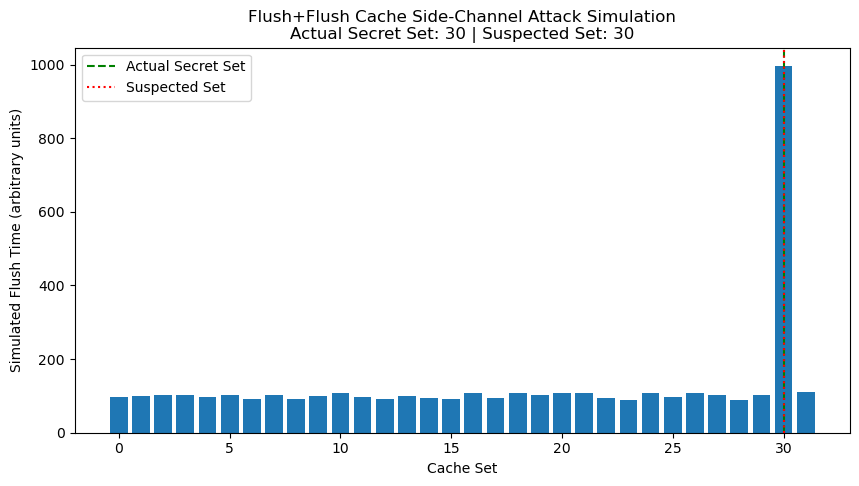

Actual Secret Cache Set: 30
Suspected Secret Cache Set: 30


In [10]:
import random
import matplotlib.pyplot as plt

class FlushFlushSimulator:
    def __init__(self, cache_sets=32):
        self.cache = [0] * cache_sets

    def flush_cache(self):
        # Attacker flushes (clears) all cache sets
        for i in range(len(self.cache)):
            self.cache[i] = 0

    def victim_access(self, secret_set):
        # Victim accesses the cache set secretly
        self.cache[secret_set] = 1  # Indicates victim usage

    def flush_and_measure(self):
        # Attacker flushes again and measures timing
        measurements = []
        for set_value in self.cache:
            if set_value == 1:
                measurements.append(1000 + random.randint(-50, 50))  # Slow eviction
            else:
                measurements.append(100 + random.randint(-10, 10))  # Fast flush
        return measurements

# Simulation setup
cache_sets = 32
secret_set = random.randint(0, cache_sets - 1)
simulator = FlushFlushSimulator(cache_sets)

# Attacker flushes cache initially
simulator.flush_cache()

# Victim secretly accesses cache
simulator.victim_access(secret_set)

# Attacker flushes again and measures the timing
measurements = simulator.flush_and_measure()
suspected_set = measurements.index(max(measurements))

# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar(range(cache_sets), measurements)
plt.xlabel('Cache Set')
plt.ylabel('Simulated Flush Time (arbitrary units)')
plt.title(f'Flush+Flush Cache Side-Channel Attack Simulation\nActual Secret Set: {secret_set} | Suspected Set: {suspected_set}')
plt.axvline(secret_set, color='green', linestyle='--', label='Actual Secret Set')
plt.axvline(suspected_set, color='red', linestyle=':', label='Suspected Set')
plt.legend()
plt.show()

print(f"Actual Secret Cache Set: {secret_set}")
print(f"Suspected Secret Cache Set: {suspected_set}")
